### Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

### Features

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

### Target

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

#### Importing the libraries

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Loading the training & testing dataset

In [26]:
df=pd.read_csv('train.csv')  #data for training purpose

In [27]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR --> DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU --> IXR --> BBI --> BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL --> LKO --> BOM --> COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU --> NAG --> BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR --> NAG --> DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU --> BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU --> BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR --> DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR --> DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [28]:
df1=pd.read_csv('test.csv')   #data for testing purpose

In [29]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL --> BOM --> COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU --> MAA --> BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL --> BOM --> COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL --> BOM --> COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR --> DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU --> DEL --> BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU --> BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL --> BOM --> COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL --> BOM --> COK,04:00,19:15,15h 15m,1 stop,No info


In [30]:
#printing the shape of each dataset

print('train data shape',df.shape)
print('test data shape',df1.shape)

train data shape (10683, 11)
test data shape (2671, 10)


Train has 10863 rows & 11 columns



Test has 2671 rowas & 10 columns

In [31]:
df.head()  # first five rows of the train dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR --> DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU --> IXR --> BBI --> BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL --> LKO --> BOM --> COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU --> NAG --> BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR --> NAG --> DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [32]:
df1.head()  #first five rows of the test dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL --> BOM --> COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU --> MAA --> BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL --> BOM --> COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL --> BOM --> COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR --> DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [33]:
df.tail()  #last five rows of the train dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU --> BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU --> BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR --> DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR --> DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL --> GOI --> BOM --> COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [34]:
df1.tail()  #last five rows of the test dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU --> DEL --> BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU --> BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL --> BOM --> COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL --> BOM --> COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL --> BOM --> COK,04:55,19:15,14h 20m,1 stop,No info


#### A brief info about train & test dataset

In [35]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


####  Checking the null values

In [37]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Train dataset is having the total 2 null values

In [38]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Test dataset has no null value

In [39]:
df.dropna(axis=0,inplace=True)  #dropping the rows having null values

In [40]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Hence, there is no null value

In [43]:
# creating a separate columns for the month, date and year 

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Month']=df['Date_of_Journey'].apply(lambda x:x.month)
df['Day']=df['Date_of_Journey'].apply(lambda x:x.day)
df['Year']=df['Date_of_Journey'].apply(lambda x:x.year)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR --> DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU --> IXR --> BBI --> BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL --> LKO --> BOM --> COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU --> NAG --> BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR --> NAG --> DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [44]:
# creating a separate columns for the month, date and year 

df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])
df1['Month']=df1['Date_of_Journey'].apply(lambda x:x.month)
df1['Day']=df1['Date_of_Journey'].apply(lambda x:x.day)
df1['Year']=df1['Date_of_Journey'].apply(lambda x:x.year)

df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Year
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL --> BOM --> COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU --> MAA --> BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL --> BOM --> COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,2019
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL --> BOM --> COK,08:00,21:00,13h,1 stop,No info,5,21,2019
4,Air Asia,2019-06-24,Banglore,Delhi,BLR --> DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24,2019


In [45]:
#dropping the date of journey column as we have separate columns for date, month & year

df.drop('Date_of_Journey',axis=1,inplace=True)
df1.drop('Date_of_Journey',axis=1,inplace=True)

#### Univariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

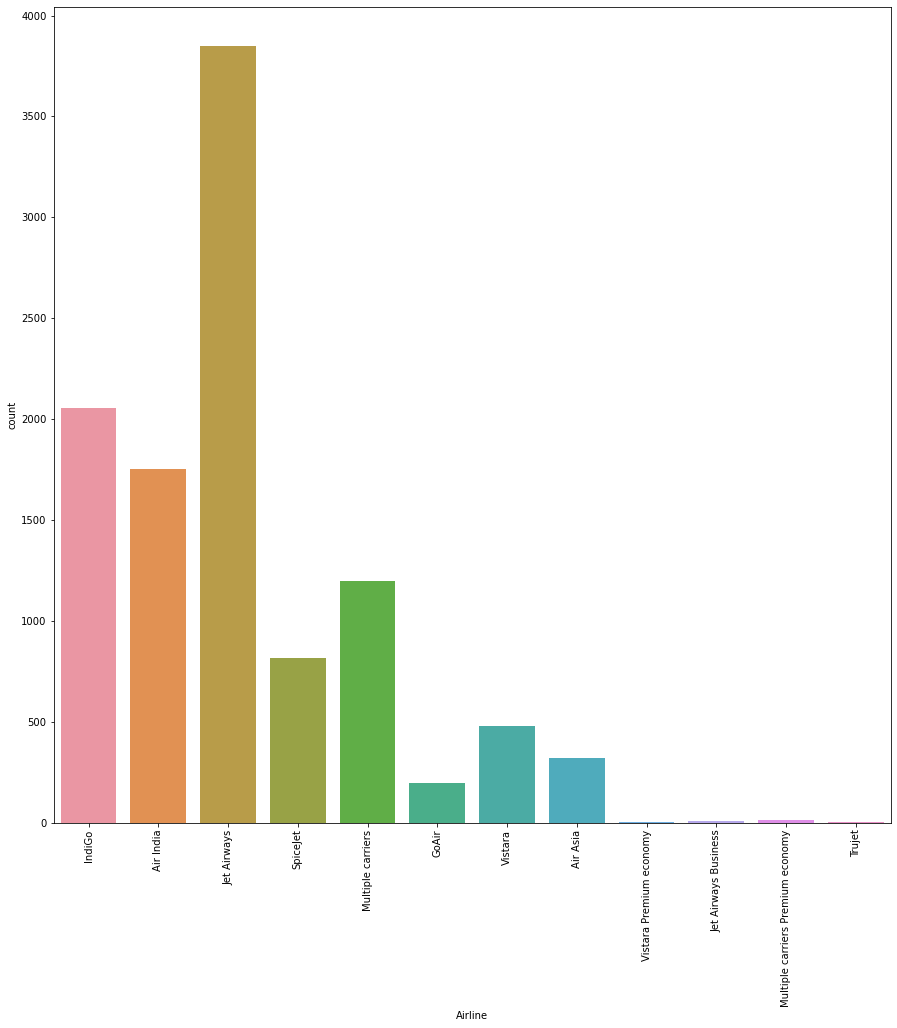

In [49]:
plt.figure(figsize=(15,15))
sns.countplot(df['Airline'])
plt.xticks(rotation=90)

Most of the flights are of Jet Airways

<AxesSubplot:xlabel='Source', ylabel='count'>

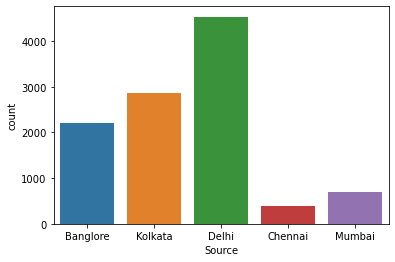

In [50]:
sns.countplot(df['Source'])

Most of the flight have their origin a Delhi followed by Kolkata

<AxesSubplot:xlabel='Destination', ylabel='count'>

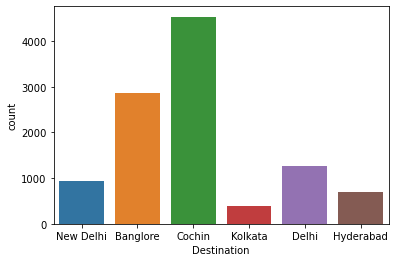

In [51]:
sns.countplot(df['Destination'])

Most of flights destined to Cochin followed by Bangalore

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

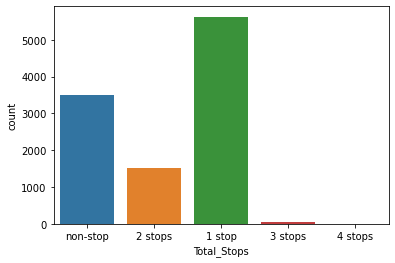

In [52]:
sns.countplot(df['Total_Stops'])

Most flight have 1 stop in bettween, very less flight have more than 2 stops

#### Bivariate Analysis

<AxesSubplot:xlabel='Month', ylabel='Price'>

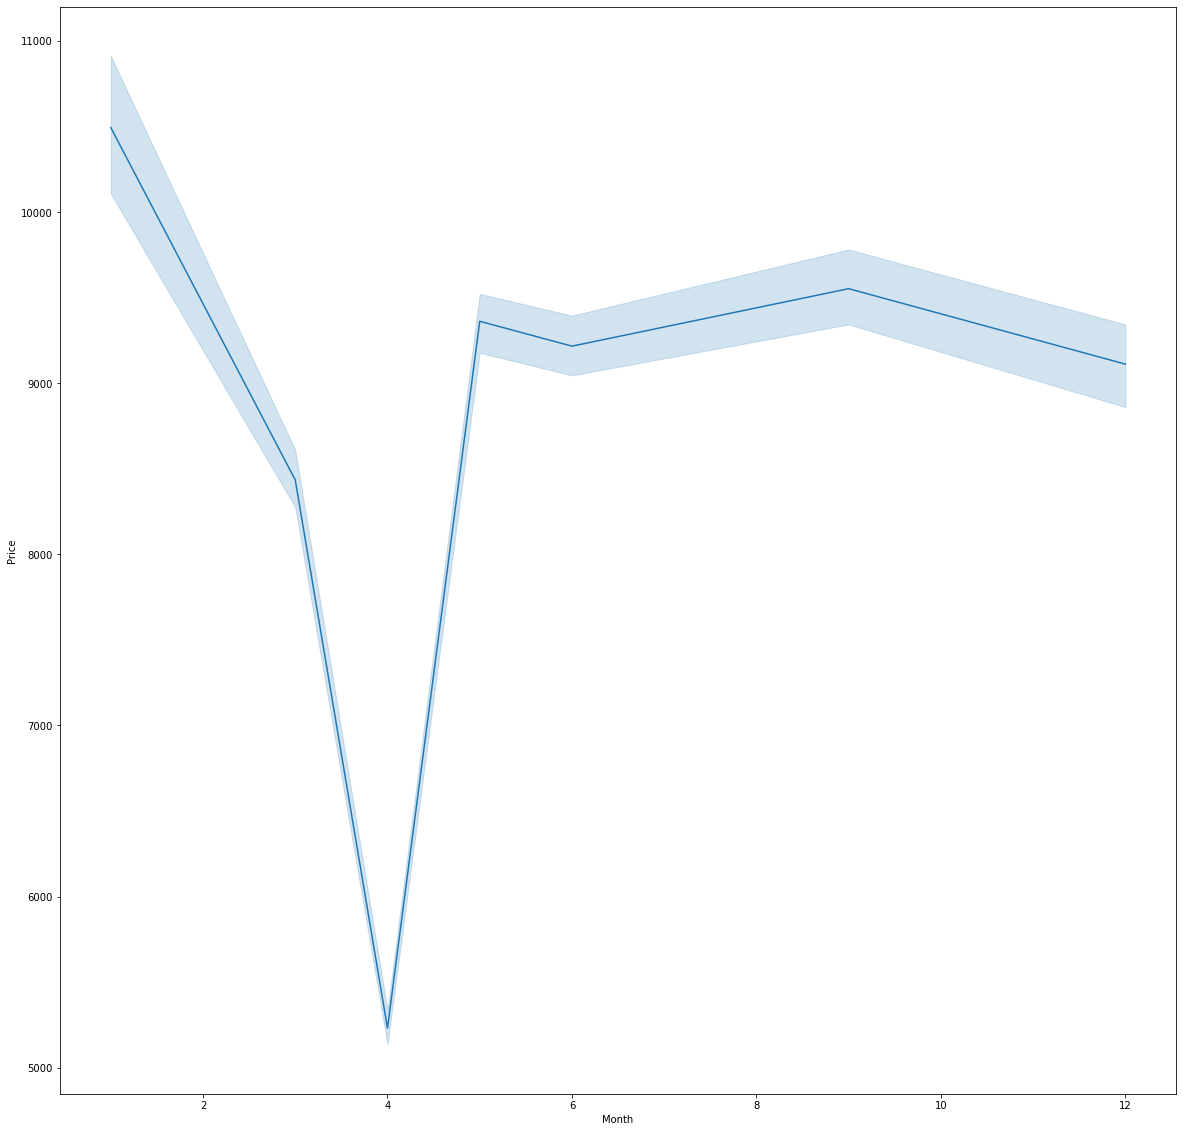

In [56]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Month'],df['Price'])

In the month of january price is too high & in the month of april prices comes down

<AxesSubplot:xlabel='Day', ylabel='Price'>

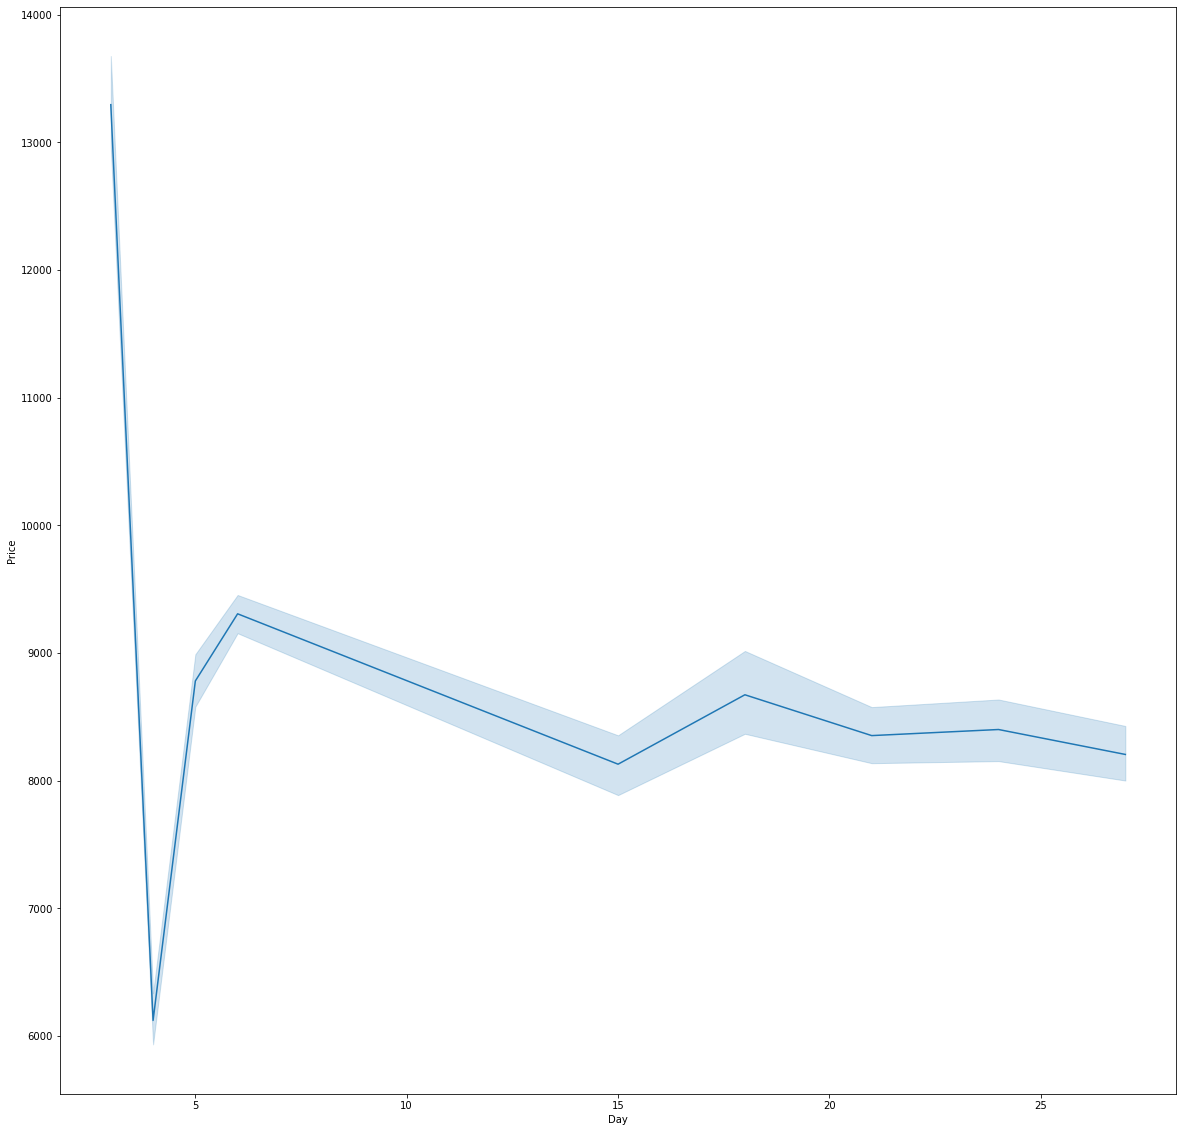

In [57]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Day'],df['Price'])

Starting og the month has a very rates of flights & then decreses & then again increase 

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

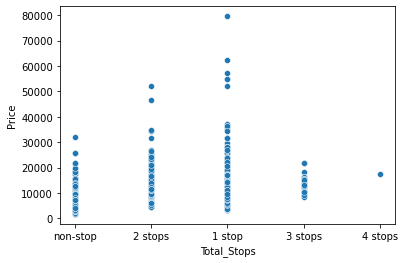

In [61]:
sns.scatterplot(df['Total_Stops'],df['Price'])

The flight with 1 stops have higher prices, followed by 2 stops

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

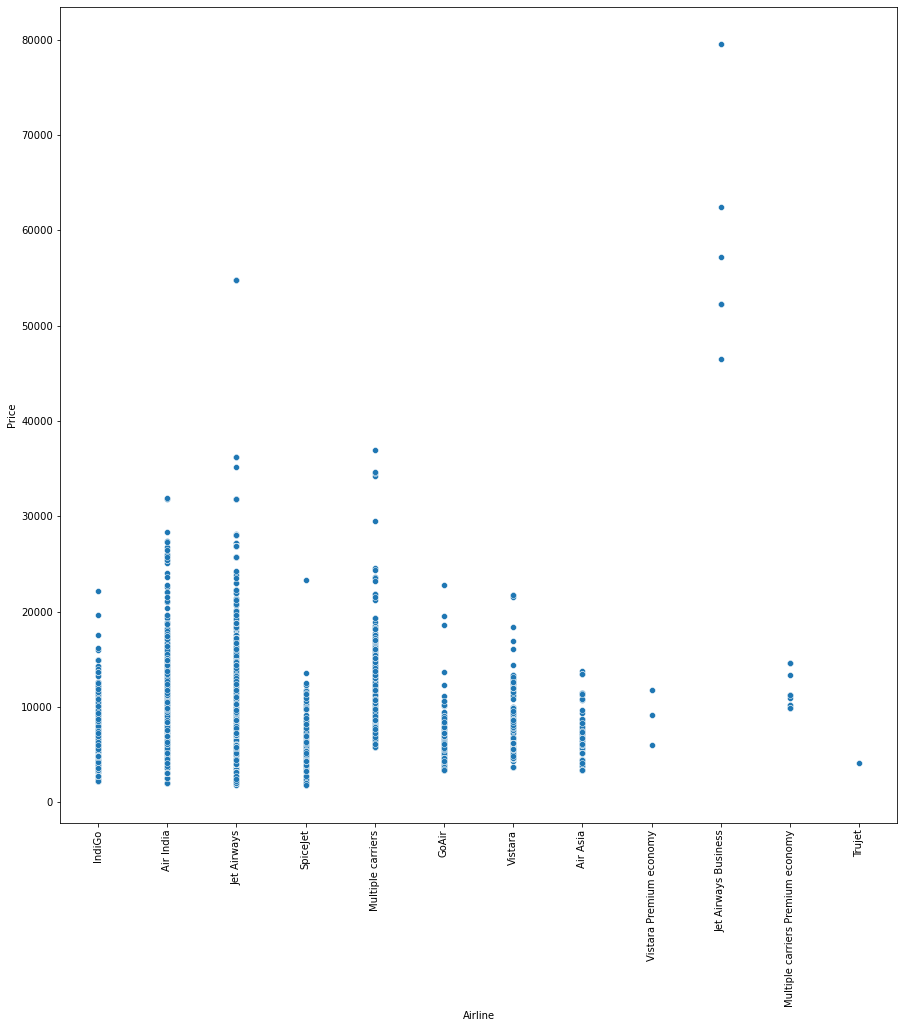

In [65]:
plt.figure(figsize=(15,15))
sns.scatterplot(df['Airline'],df['Price'])
plt.xticks(rotation=90)

The price is too high for Jet Airways Business followed by normal jet airways,multiple carriers

<AxesSubplot:xlabel='Source', ylabel='Price'>

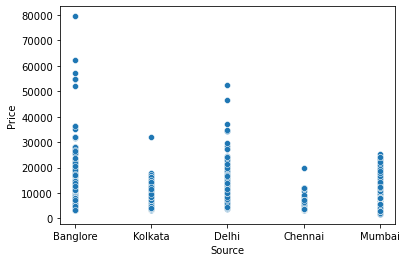

In [66]:
sns.scatterplot(df['Source'],df['Price'])

The flights having their origin from Bangalore are more exoensive than others 

<AxesSubplot:xlabel='Destination', ylabel='Price'>

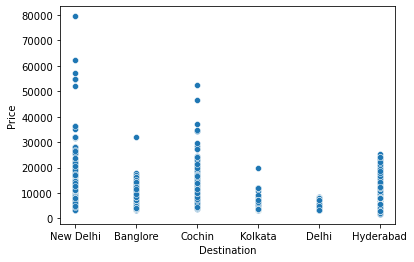

In [68]:
sns.scatterplot(df['Destination'],df['Price'])

The flights destined to Delhi are more expensive followed by Cochin

#### Multivariate Analysis

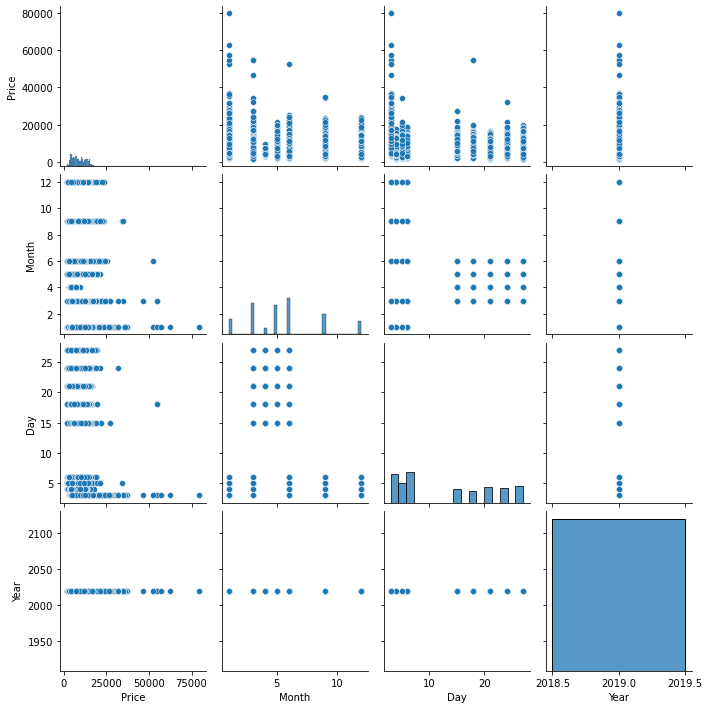

In [73]:
sns.pairplot(df)

#### Label Encoding for both the dataset

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].astype(str))
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year
0,3,0,5,18,211,233,240,4,8,3897,3,24,2019
1,1,3,0,84,31,906,336,1,8,7662,1,5,2019
2,4,2,1,118,70,413,106,1,8,13882,9,6,2019
3,3,3,0,91,164,1324,311,0,8,6218,12,5,2019
4,3,0,5,29,149,1237,303,0,8,13302,1,3,2019


In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=le.fit_transform(df1[i].astype(str))
        
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Year
0,4,2,1,76,138,150,10,0,5,6,6,2019
1,3,3,0,65,31,353,248,0,5,12,5,2019
2,4,2,1,76,156,566,148,0,3,5,21,2019
3,6,2,1,76,48,633,36,0,5,5,21,2019
4,0,0,2,16,198,135,216,4,5,6,24,2019


#### Statistical Summary

In [76]:
df.describe()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0
mean,3.966205,1.952256,1.436154,74.820165,107.983898,869.846564,194.072177,1.458248,7.392998,9087.214567,5.534731,12.682925,2019.0
std,2.352090,1.177276,1.474845,36.729039,61.087537,331.519717,108.625225,1.806320,1.214254,4611.548810,2.987626,8.803800,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0
25%,3.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000,3.000000,5.000000,2019.0
50%,4.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000,5.000000,6.000000,2019.0
75%,4.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000,6.000000,21.000000,2019.0
max,11.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000,12.000000,27.000000,2019.0


- total counts is 10682
- outliers are present 
- skewness is present in few of the rows

####  Correlation

In [78]:
corr=df.corr()
corr

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year
Airline,1.000000,-0.013397,0.018446,0.025214,-0.039508,-0.015804,0.027886,0.035973,-0.060748,-0.039565,-0.007900,0.031118,NaN
Source,-0.013397,1.000000,-0.592576,0.403412,0.055194,0.020847,-0.192009,-0.225605,-0.022109,0.015999,0.063052,0.007563,NaN
Destination,0.018446,-0.592576,1.000000,-0.461176,-0.063625,-0.036847,0.022029,0.337872,0.026821,-0.071122,-0.105035,-0.052102,NaN
Route,0.025214,0.403412,-0.461176,1.000000,-0.082013,0.010604,-0.062078,-0.437749,0.035152,0.164149,0.042194,0.096601,NaN
Dep_Time,-0.039508,0.055194,-0.063625,-0.082013,1.000000,-0.023325,0.041605,0.044647,-0.052828,0.002931,0.027755,-0.003445,NaN
Arrival_Time,-0.015804,0.020847,-0.036847,0.010604,-0.023325,1.000000,0.027731,-0.097180,0.017532,0.027358,-0.002294,0.001437,NaN
Duration,0.027886,-0.192009,0.022029,-0.062078,0.041605,0.027731,1.000000,0.175191,0.080166,-0.144280,-0.038860,0.024745,NaN
Total_Stops,0.035973,-0.225605,0.337872,-0.437749,0.044647,-0.097180,0.175191,1.000000,0.164054,-0.571221,-0.056514,0.043844,NaN
Additional_Info,-0.060748,-0.022109,0.026821,0.035152,-0.052828,0.017532,0.080166,0.164054,1.000000,-0.065463,-0.009105,-0.019416,NaN
Price,-0.039565,0.015999,-0.071122,0.164149,0.002931,0.027358,-0.144280,-0.571221,-0.065463,1.000000,0.010705,-0.165448,NaN


<AxesSubplot:>

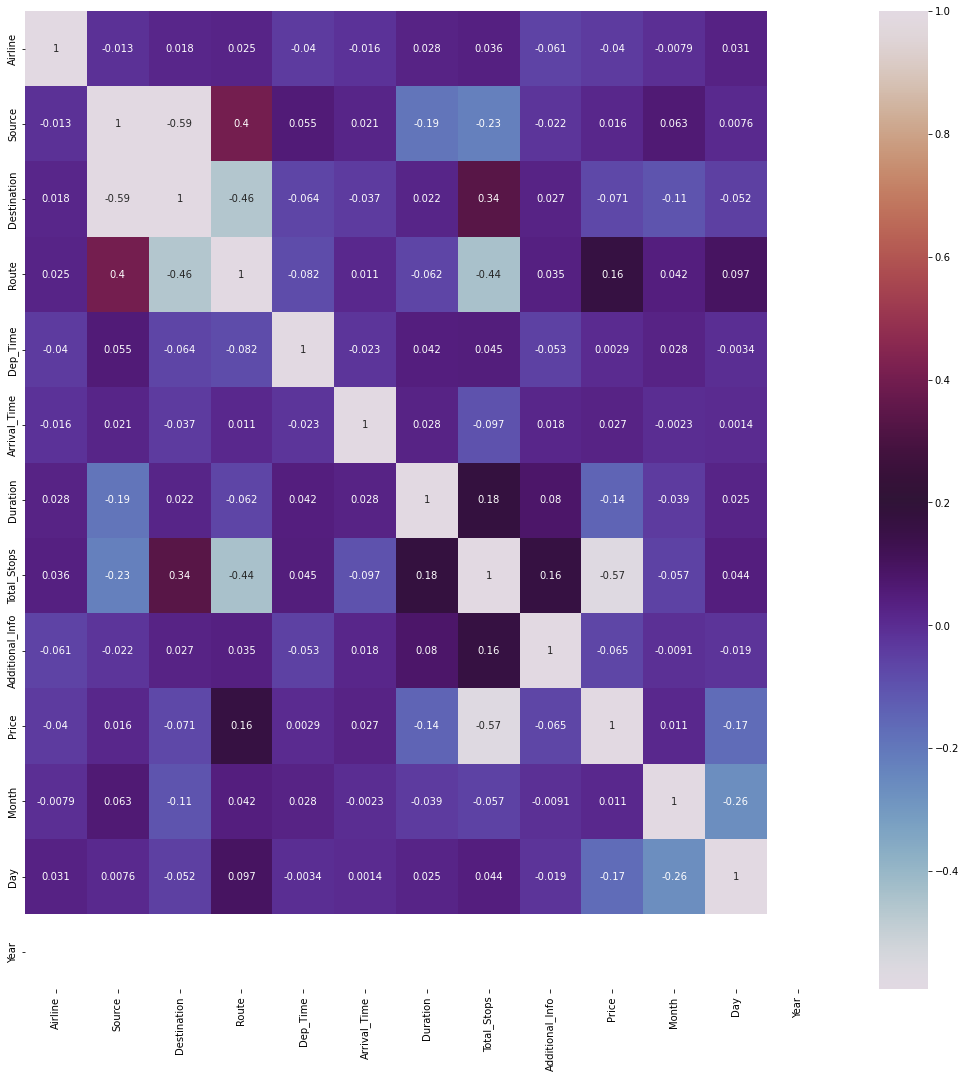

In [79]:
plt.figure(figsize=(18,18))  #plotting the correlation using the heatmap
sns.heatmap(corr,annot=True,cmap='twilight')

In [80]:
corr['Price'].sort_values()  #sorting the correlation with the target variable

Total_Stops       -0.571221
Day               -0.165448
Duration          -0.144280
Destination       -0.071122
Additional_Info   -0.065463
Airline           -0.039565
Dep_Time           0.002931
Month              0.010705
Source             0.015999
Arrival_Time       0.027358
Route              0.164149
Price              1.000000
Year                    NaN
Name: Price, dtype: float64

In [81]:
df.drop('Year',axis=1,inplace=True)  #dropping the year column as it has no significance
df1.drop('Year',axis=1,inplace=True)

#### Checking the skewness

In [82]:
df.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Route             -0.501911
Dep_Time           0.194914
Arrival_Time      -0.606676
Duration          -0.213498
Total_Stops        0.631532
Additional_Info   -1.779689
Price              1.812405
Month              0.629556
Day                0.367212
dtype: float64

Very less skewness is present in the dataset

#### Plotting the outliers

Airline                AxesSubplot(0.125,0.71587;0.227941x0.16413)
Source              AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Destination         AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Route                 AxesSubplot(0.125,0.518913;0.227941x0.16413)
Dep_Time           AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Arrival_Time       AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Duration              AxesSubplot(0.125,0.321957;0.227941x0.16413)
Total_Stops        AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Additional_Info    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Price                    AxesSubplot(0.125,0.125;0.227941x0.16413)
Month                 AxesSubplot(0.398529,0.125;0.227941x0.16413)
Day                   AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

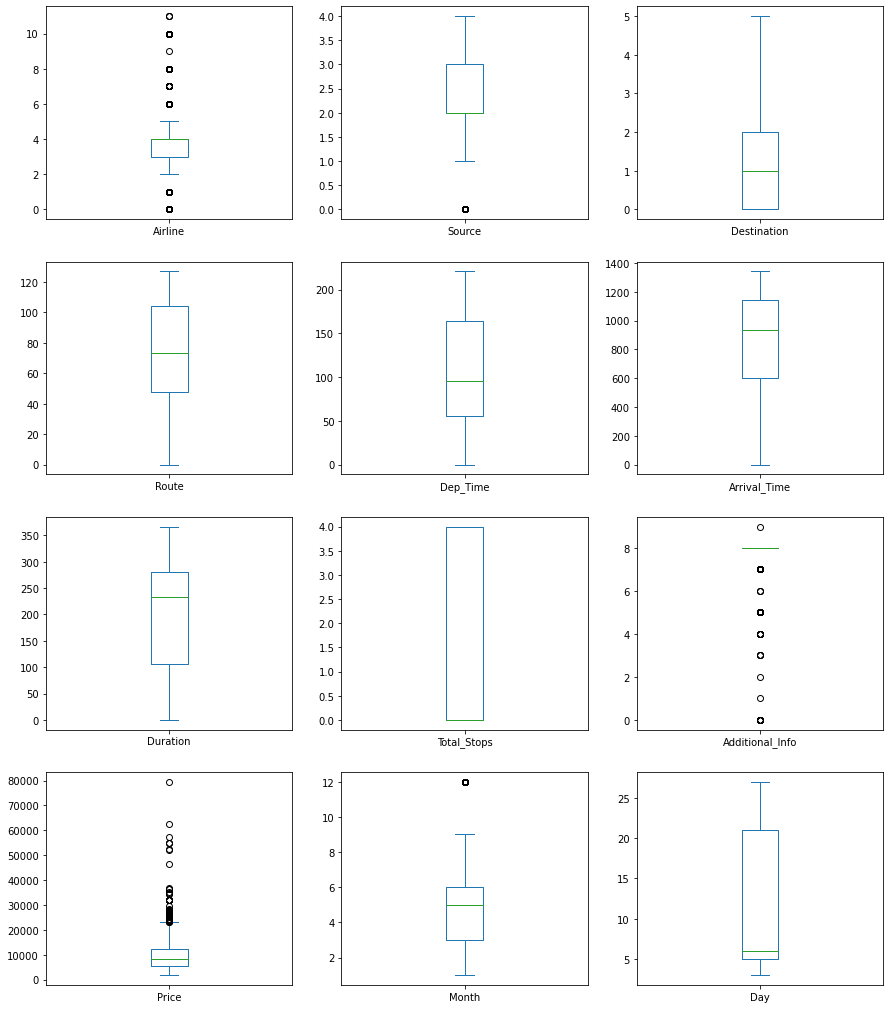

In [83]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,18))

#### Removing the outliers

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9192,  9238,  9631,  9656,  9714,
        9973, 10051, 10112, 10159, 10181, 10188, 10352, 10363, 10363,
       10382, 10438, 10510, 10510], dtype=int64), array([9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9,

(10577, 12)

#### Model Building

In [104]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Month', 'Day'],
      dtype='object')

In [105]:
df=df[['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Month', 'Day','Price']]

In [106]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [109]:
#importing the different machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [110]:
# defining the different models

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

#### FInding the best random state

In [111]:
model=[lg,rdr,svr,dtr,knr]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.44979420926378644 on random state 59


In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=59,test_size=.20)

#### Linear regression

In [113]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.44979420926378644


#### Decision tree regressor

In [114]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.9015087291458517


#### Support vector regressor

In [115]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  -0.018423411224324227


#### KNeighbor regressor

In [116]:
knr.fit(x_train,y_train)
pred4=knr.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.7172112905101627


#### Random forest regressor

In [117]:
rdr.fit(x_train,y_train)
pred5=rdr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.9376773820892362


#### Cross val score

In [118]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(rdr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  92.44767610099078
at cv=  4
cross val score =  92.62858515937926
at cv=  5
cross val score =  92.81311630691391
at cv=  6
cross val score =  92.80263726905238


In [119]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
l1=[pred1,pred2,pred3,pred4,pred5]
for i in l1:
    print('error:')

    print('mean absolute error: ',mean_absolute_error(y_test,i))
    print('mean squared error: ',mean_squared_error(y_test,i))
    print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,i)))
    print('\n')

error:
mean absolute error:  2429.207973604739
mean squared error:  9223993.67496074
root mean squared error:  3037.1028423418165


error:
mean absolute error:  572.3392407057341
mean squared error:  1651169.2074012812
root mean squared error:  1284.9782906342352


error:
mean absolute error:  3476.558452099568
mean squared error:  17073486.433131456
root mean squared error:  4132.007554825071


error:
mean absolute error:  1529.077315689981
mean squared error:  4740846.627939509
root mean squared error:  2177.3485315721755


error:
mean absolute error:  536.8128497628185
mean squared error:  1044815.3092803191
root mean squared error:  1022.1620758374472




We are getting the least error in Random forest regressor and model accuracy upto 93%

#### Saving the model

In [120]:
import pickle
filename='flight_price.pkl'
pickle.dump(rdr, open(filename,'wb'))

In [121]:
a=np.array(y_test)
pred=np.array(pred5)
Flight_Price=pd.DataFrame({'Actual':a,'Predicted':pred})
Flight_Price

,Actual,Predicted
0,3625,3305.450000
1,4174,3994.930000
2,14781,14734.860000
3,11728,10800.362500
4,11538,12005.280000
...,...,...
2111,9443,9854.535333
2112,4332,4001.440000
2113,9925,11016.020000
2114,4483,4670.320000


#### Predicted the price for given test dataset

In [122]:
loaded_model = pickle.load(open(filename, 'rb'))

In [123]:
pred=loaded_model.predict(df1)

In [125]:
pred

array([10109.6       ,  5365.31      , 12145.23      , ...,
       14334.32      , 12451.94      ,  8961.34666667])

In [126]:
Flight_price_prediction=pd.DataFrame(data=df1)
Flight_price_prediction['Predicted_Price']=pred

In [127]:
Flight_price_prediction

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Predicted_Price
0,4,2,1,76,138,150,10,0,5,6,6,10109.600000
1,3,3,0,65,31,353,248,0,5,12,5,5365.310000
2,4,2,1,76,156,566,148,0,3,5,21,12145.230000
3,6,2,1,76,48,633,36,0,5,5,21,9606.486667
4,0,0,2,16,198,135,216,4,5,6,24,3514.460000
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,170,617,150,0,5,6,6,8282.280000
2667,3,3,0,43,106,507,213,4,5,3,27,3257.470000
2668,4,2,1,76,183,151,278,0,5,6,3,14334.320000
2669,1,2,1,76,11,577,60,0,5,6,3,12451.940000
